In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('C:/Users/jadha/Desktop/Codeclause_Internship/Task 3(Crop Disease Identification)/Dataset.csv')

In [5]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

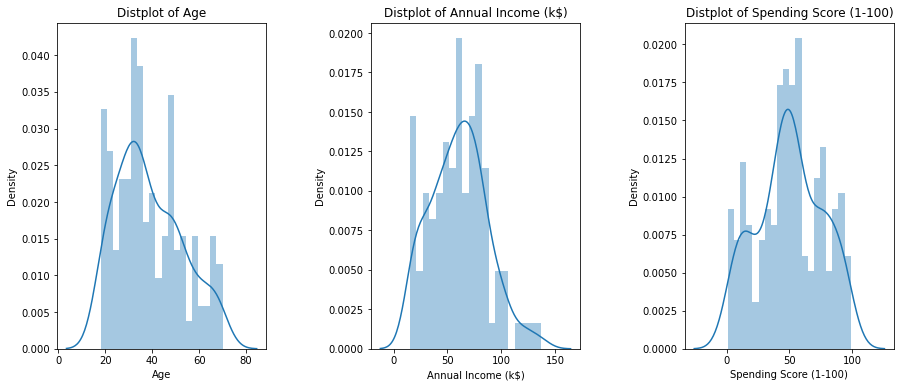

In [9]:
plt.figure(figsize=(15,6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(customer_data[cols], bins = 20)
  plt.title('Distplot of {}'.format(cols))
plt.show()


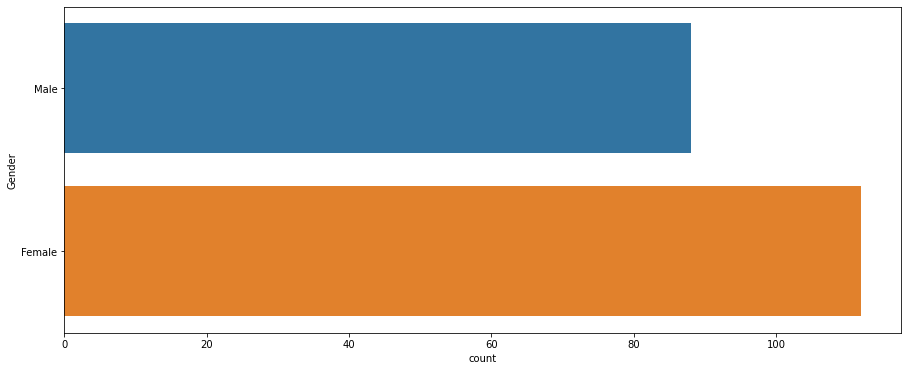

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(y = 'Gender', data = customer_data)
plt.show()

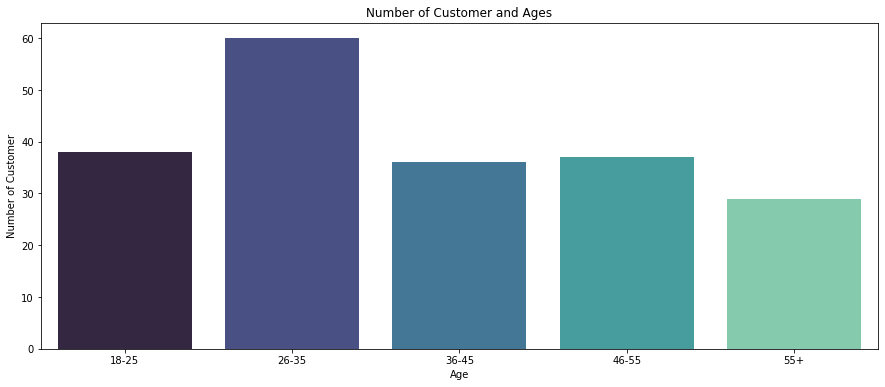

In [11]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55above = customer_data.Age[customer_data.Age >= 56]

age_x = ["18-25","26-35","36-45","46-55", "55+"]
age_y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


Choosing the Annual Income Column & Spending Score column

In [12]:
spending_score_1_20 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 1) & (customer_data['Spending Score (1-100)'] <= 20)]
spending_score_21_40 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 21) & (customer_data['Spending Score (1-100)'] <= 40)]
spending_score_41_60 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 41) & (customer_data['Spending Score (1-100)'] <= 60)]
spending_score_61_80 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 61) & (customer_data['Spending Score (1-100)'] <= 80)]
spending_score_81_100 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 81) & (customer_data['Spending Score (1-100)'] <= 100)]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

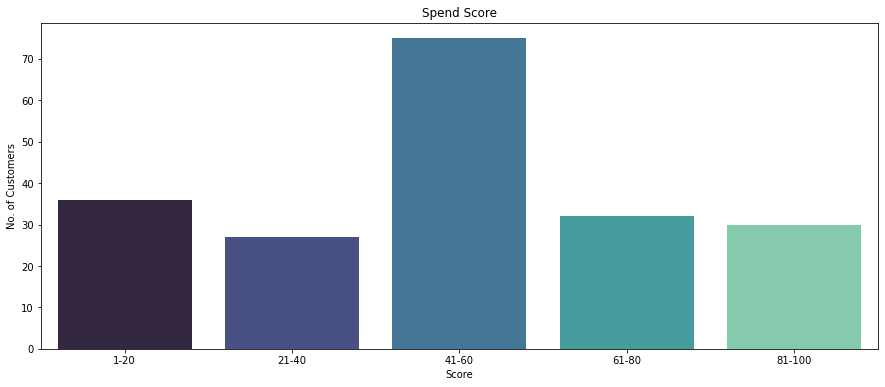

In [13]:
spending_score_1_20 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 1) & (customer_data['Spending Score (1-100)'] <= 20)]
spending_score_21_40 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 21) & (customer_data['Spending Score (1-100)'] <= 40)]
spending_score_41_60 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 41) & (customer_data['Spending Score (1-100)'] <= 60)]
spending_score_61_80 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 61) & (customer_data['Spending Score (1-100)'] <= 80)]
spending_score_81_100 = customer_data['Spending Score (1-100)'][(customer_data['Spending Score (1-100)'] >= 81) & (customer_data['Spending Score (1-100)'] <= 100)]

x_axis = ["1-20", "21-40", "41-60", "61-80", "81-100"]
y_axis = [len(spending_score_1_20.values), len(spending_score_21_40.values), len(spending_score_41_60.values), len(spending_score_61_80.values), len(spending_score_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_axis, y=y_axis, palette="mako")
plt.title("Spend Score")
plt.ylabel("No. of Customers")
plt.xlabel("Score")
plt.show()

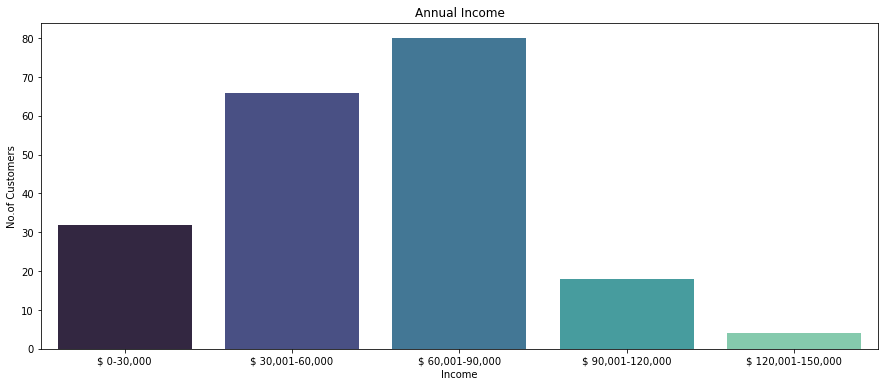

In [14]:
annual_inc0_30 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 1) & (customer_data['Annual Income (k$)'] <= 30)]
annual_inc31_60 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 31) & (customer_data['Annual Income (k$)'] <= 60)]
annual_income_61_90 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 61) & (customer_data['Annual Income (k$)'] <= 90)]
annual_income_91_120 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 91) & (customer_data['Annual Income (k$)'] <= 120)]
annual_income_121_150 = customer_data['Annual Income (k$)'][(customer_data['Annual Income (k$)'] >= 121) & (customer_data['Annual Income (k$)'] <= 150)]

x_axis1 = ["$ 0-30,000", "$ 30,001-60,000", "$ 60,001-90,000", "$ 90,001-120,000", "$ 120,001-150,000"]
y_axis1 = [len(annual_inc0_30.values), len(annual_inc31_60.values), len(annual_income_61_90.values), len(annual_income_91_120.values), len(annual_income_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x_axis1, y=y_axis1, palette="mako")
plt.title("Annual Income")
plt.ylabel("No.of Customers")
plt.xlabel("Income")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


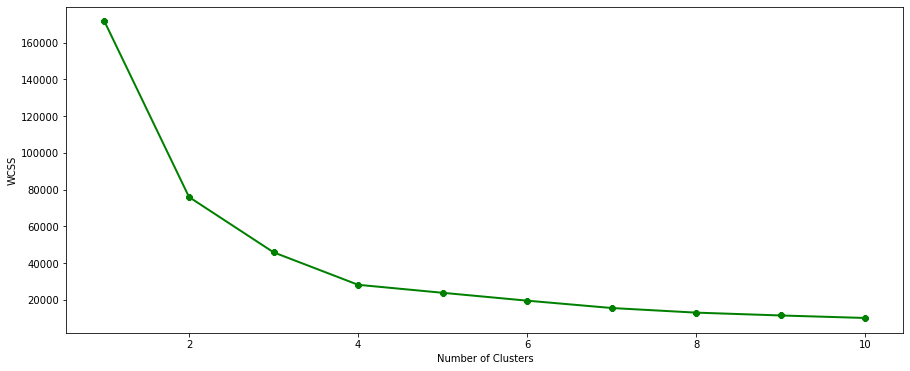

In [15]:
# Extracting the required columns and converting them to a numpy array
A1 = customer_data[['Age', 'Spending Score (1-100)']].to_numpy()

# List to store the within-cluster sum of squares (WCSS) values
wcss = []

# Loop to calculate WCSS for different numbers of clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans.fit(A1)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.figure(figsize=(15, 6))
plt.plot(range(1, 11), wcss, color='green', linewidth=2, marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters = 4)
label1 = kmeans.fit_predict(A1)
print(label1)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [17]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


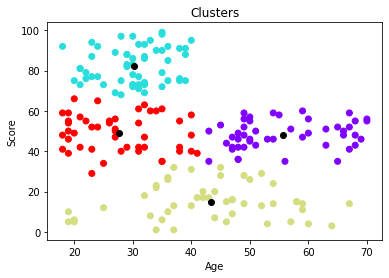

In [22]:
plt.scatter(A1[:,0], A1[:,1], c = label1, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black")
plt.title("Clusters")
plt.xlabel("Age")
plt.ylabel("Score")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


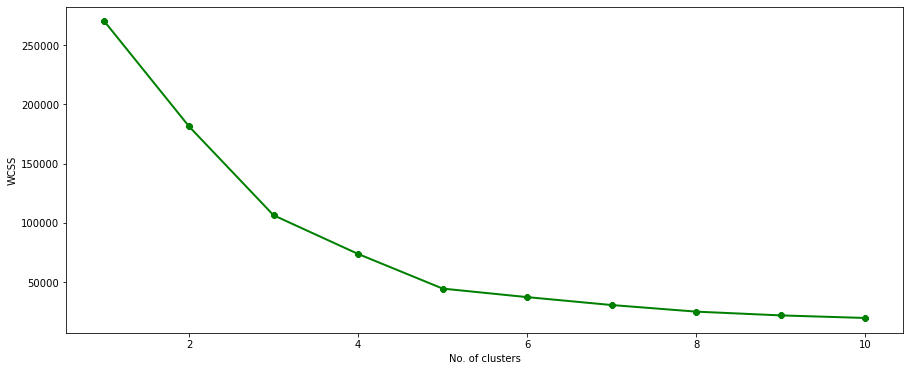

In [23]:
A2 = customer_data.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(A2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 6))
plt.plot(range(1,11), wcss, linewidth = 2, color = "green", marker = "8")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans1 = KMeans(n_clusters = 5)
label2 = kmeans1.fit_predict(A2)
print(label2)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [25]:
print(kmeans1.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


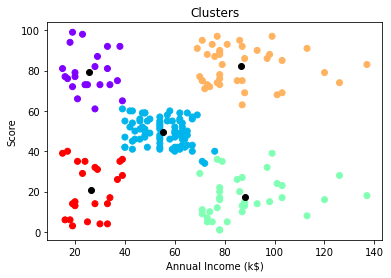

In [26]:
plt.scatter(A2[:,0], A2[:,1], c = label2, cmap = "rainbow")
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], color = "black")
plt.title("Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Score")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


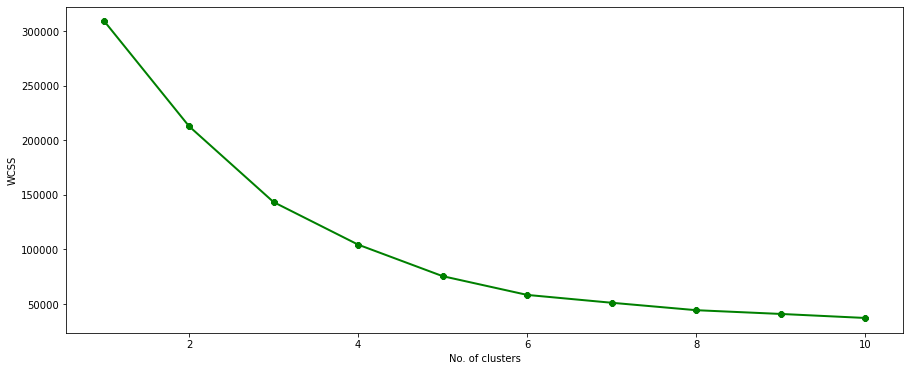

In [44]:
A3 = customer_data.iloc[:,2:]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(A3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15,6))
plt. plot(range(1,11), wcss, linewidth = 2, color = "green", marker = "8")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans2 = KMeans(n_clusters = 5)
label3 = kmeans2.fit_predict(A3)
print(label3)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [29]:
print(kmeans2.cluster_centers_)

[[40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]]


In [39]:
X = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit(X)

In [40]:
import joblib
joblib.dump(Y, 'kmeans_model.pkl')

['kmeans_model.pkl']

Inertia: 75378.76464074482
Silhouette Score: 0.44446409171786105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


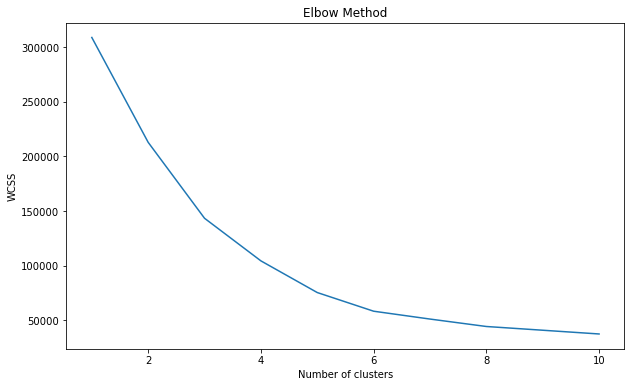

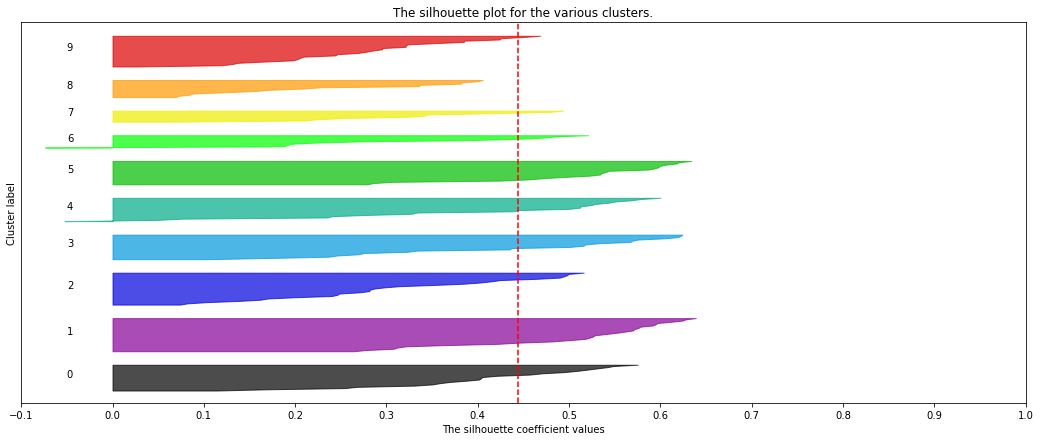

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples
def evaluate_model(X, kmeans):
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette_avg}")
    
    # Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    # Silhouette Analysis
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (kmeans.n_clusters + 1) * 10])
    
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    for i in range(kmeans.n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([i / 10 for i in range(-1, 11)])
    plt.show()
    
evaluate_model(X, Y)

##### A silhouette score of 0.44 is moderately good. It indicates that the clusters are reasonably well-defined, but there might be some overlap between clusters.